<a class="anchor" id="toc"></a>
# Анализ бизнес-показателей приложения Procrastinate Pro+

# Содержание


1. [Описание исследования](#toc_2)

2. [Загрузим данные и подготовим их к анализу](#download)

3. [Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.](#function)

4. [Исследовательский анализ данных](#study)

5. [Маркетинг](#marketing)

6. [Оцените окупаемость рекламы](#roi)

7. [Выводы](#conclusion)

<a class="anchor_3" id="toc_2"></a>
### Описание исследования



__Цель исследования__

Провести маркетинговый анализ развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Наша задача — разобраться в причинах и помочь компании выйти в плюс.

__Описание данных__

В нашем распоряжении три датасета. Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.

Структура `visits_info_short.csv`:
- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

Структура `orders_info_short.csv`:
- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

Структура `costs_info_short.csv`:
- `dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.

__Ход исследования__

Сперва необходимо сделать обзор данных и предобработку. Следом проведем исследование по следующим шагам:

    Шаг 1. Загрузим данные и подготовьте их к анализу
    Шаг 2. Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.
    Шаг 3. Исследовательский анализ данных
    Шаг 4. Маркетинг
    Шаг 5. Оценим окупаемость рекламы
    Шаг 6. Напишем выводы


<a class="anchor_3" id="download"></a>
### Загрузим данные и подготовим их к анализу

<b>Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.</b>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
try:
    visits, orders, costs = (
        pd.read_csv('/datasets/visits_info_short.csv'),
        pd.read_csv('/datasets/orders_info_short.csv'),
        pd.read_csv('/datasets/costs_info_short.csv'),
    )
except:
    visits, orders, costs = (
        pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv'),
        pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv'),
        pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv'),
    )

Выведем сначала основную информацию и взглянем на таблицы:

In [3]:
def proc_val(data):
    
    display(data.head(5))
    data.info()
    print()
    print('Количество строк-дубликатов:', data.duplicated().sum())

    if 'user_id' in data.columns:
        print('Количество дубликатов user_id:', data['user_id'].isna().sum())

In [4]:
data_list = [visits, orders, costs]
name_list = ['visits', 'orders', 'costs']
for i, df in enumerate(data_list):
    print()
    print()
    print('Table_name:', name_list[i])
    print('_' * len('Table_name:' + name_list[i]))
    proc_val(df)



Table_name: visits
_________________


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

Количество строк-дубликатов: 0


Table_name: orders
_________________


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

Количество строк-дубликатов: 0


Table_name: costs
________________


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB

Количество строк-дубликатов: 0


Пропусков и строк-дубликатов нет, но требуется небольшая обработка.
Сперва преобразуем данные о времени и поменяем название колонок, чтобы с ними было удобней работать

In [5]:
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [6]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower().str.replace(' ', '_')

Теперь выборочно взглянем на распределение и характеристики данных

In [7]:
def more_info(data, col=[]):
    plt.figure(figsize=(20, 10))

    ax1 = plt.subplot(2, 3, 1)
    data.boxplot(column=col, ax=ax1)
    plt.title('Распределение значений')

    ax2 = plt.subplot(2, 3, 2)
    data[col].hist(ax=ax2)
    plt.title('Гистограмма значений');
    
    display(data[col].describe().to_frame())


Value_name: revenue
__________________


,revenue
count,40212.000000
mean,5.370608
std,3.454208
min,4.990000
25%,4.990000
50%,4.990000
75%,4.990000
max,49.990000



Value_name: costs
________________


,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


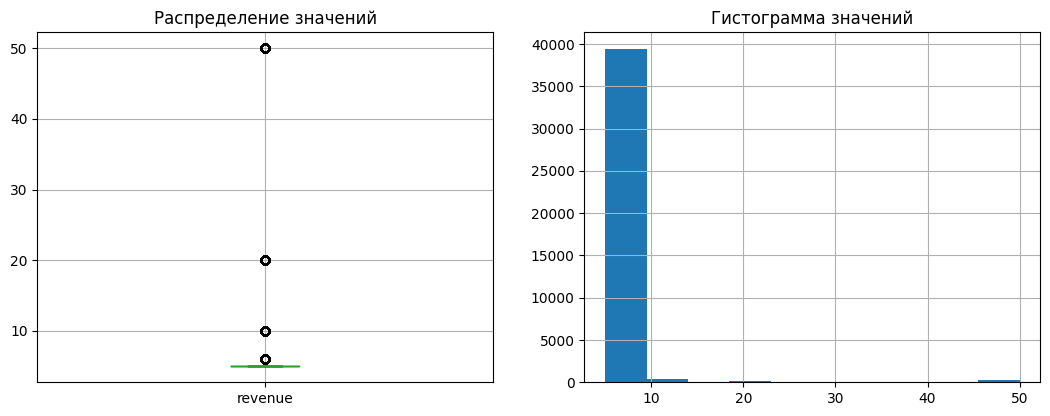

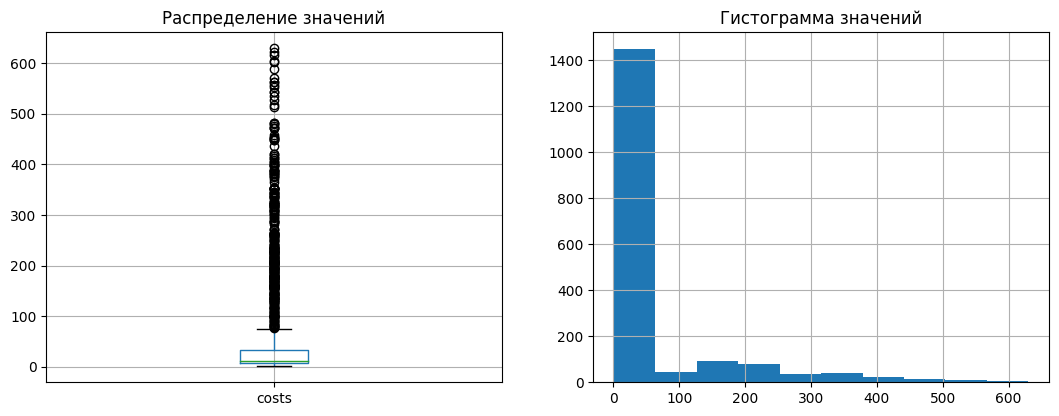

In [8]:
data_list = [orders, costs]
name_list = ['revenue', 'costs']
for i, df in enumerate(data_list):
    print()
    print('Value_name:', name_list[i])
    print('_' * len('Table_name:' + name_list[i]))
    more_info(df, name_list[i])

В колонках присутствуют экстремальные значения. Их немного, но их стоит учитывать при подсчете, например, среднего. Аномалий в значениях не обнаружено.

Проверим на дубликаты

In [9]:
data_list = [visits['region'], visits['device'], visits['channel'], costs['channel']]
name_list = ["visits['region']", "visits['device']", "visits['channel']", "costs['channel']"]
for i, df in enumerate(data_list):
    print()
    print()
    print('Уникальные значения колонки', name_list[i])
    print('_' * len('Уникальные значения колонки' + name_list[i]))
    display(data_list[i].unique())



Уникальные значения колонки visits['region']
___________________________________________


array(['United States', 'UK', 'France', 'Germany'], dtype=object)



Уникальные значения колонки visits['device']
___________________________________________


array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)



Уникальные значения колонки visits['channel']
____________________________________________


array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)



Уникальные значения колонки costs['channel']
___________________________________________


array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Дубликатов в категориальных значениях не найдено.

Проверим даты на ошибки.

In [10]:
# определяем минимальную и максимальную даты привлечения пользователей
def check_data(date):
    min_values = date.min()
    max_values = date.max()
    print(f'Минимальная дата: {min_values}')
    print(f'Максимальная дата: {max_values}')

In [11]:
data_list = [visits['session_start'], visits['session_end'], orders['event_dt'], costs['dt']]

for i in data_list:
    check_data(i)
    print()

Минимальная дата: 2019-05-01 00:00:41
Максимальная дата: 2019-10-31 23:59:23

Минимальная дата: 2019-05-01 00:07:06
Максимальная дата: 2019-11-01 01:38:46

Минимальная дата: 2019-05-01 00:28:11
Максимальная дата: 2019-10-31 23:56:56

Минимальная дата: 2019-05-01
Максимальная дата: 2019-10-27



Минимальная и максимальная даты не выходят за границы lfn из ТЗ.

Проверим, чтобы начало сессий было раньше окончания. Найдем количество неверных записей

In [12]:
visits.query('session_start > session_end')['user_id'].sum()

0

В целом данные достаточно чистые и каких-то серьезных проблем не обнаружено. Можно приступать к анализу.

<a class="anchor" id="function"></a>
### Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

In [13]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs, events=False, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    if not events: 
        for event in event_names:
            if event in events['event_name'].unique():
                profiles[event] = profiles['user_id'].isin(
                    events.query('event_name == @event')['user_id'].unique()
                )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [14]:
# функция для расчёта удержания

def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [15]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [16]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [17]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [18]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [19]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [20]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

<a class="anchor" id="study"></a>
### Исследовательский анализ данных

<b>Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.</b>

In [21]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)

# определяем минимальную и максимальную даты привлечения пользователей
max_date = profiles['first_ts'].max().date().isoformat()
min_date = profiles['first_ts'].min().date().isoformat()

print(f'Максимальная дата привлечения пользователей: {min_date}')
print(f'Минимальная дата привлечения пользователей: {max_date}')
profiles.head(5)

Максимальная дата привлечения пользователей: 2019-05-01
Минимальная дата привлечения пользователей: 2019-10-27


,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Мы получили профили пользователей. Даты соответствуют исследуемым датам из тех задания: с 1 мая по 27 октября 2019 года. В нашем распоряжении более 5 месяцев для анализа.

<b>Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.</b>

In [22]:
# напишем функцию специально для таблицы профилей,
# которая будет считать количество и долю платящих пользователей

def profiles_payers(group_values): # group_values - признак группировки
    
    profiles_copy = profiles.copy()
    profiles_group = profiles_copy.groupby(
        by=group_values
    ).agg({
        'user_id':'nunique',
        'payer':'mean'
    }).rename(
        columns=({'user_id':'num_users',
                 'payer':'share_payers, %'})
    ).sort_values(
        by='num_users',
        ascending=False
    ).round(3)    
    profiles_group['share_payers, %'] *= 100
    return profiles_group

In [23]:
profiles_payers('region')

,num_users,"share_payers, %"
region,,
United States,100002,6.9
UK,17575,4.0
France,17450,3.8
Germany,14981,4.1


Лидирует по количеству пользователей и доле платящих - США с показателями в 100 тыс.чел. и долей платящих 7%. Остальные страны отстают более чем на 82 тыс.чел. и 3% платящих соответственно. 

<b>Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построем таблицу, отражающую количество пользователей и долю платящих для каждого устройства.</b>

In [24]:
profiles_payers('device')

,num_users,"share_payers, %"
device,,
iPhone,54479,6.2
Android,35032,5.9
PC,30455,5.0
Mac,30042,6.4


Лидерами среди используемых девайсов клиентов являются iPhone, а аутсайдер - Mac. По отношению к платящим пользователям Mac лидирует, хоть и не сильно: менее чем на 0.2% отстает от iPhone. 

<b>Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построем таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.</b>

In [25]:
profiles_payers('channel')

,num_users,"share_payers, %"
channel,,
organic,56439,2.1
FaceBoom,29144,12.2
TipTop,19561,9.6
OppleCreativeMedia,8605,2.7
LeapBob,8553,3.1
WahooNetBanner,8553,5.3
RocketSuperAds,4448,7.9
MediaTornado,4364,3.6
YRabbit,4312,3.8


При беглом осмотре видим, что лучше всего справляется с привлечением клиентов обычный органический поиск, что нельзя сказать о привлечении платящих пользователей, т.к. "органики" показывают наихудшие показатели в этом плане - 2%. А вот хорошим источником платящих клиентов оказался канал FaceBoom, с конверсией в покупку 12%.

Итак, идеальным клиентом на данном этапе (основываясь на исследовании с 01 мая 2019 по 27 октября 2019) кажется житель Соединенных Штатов, пользующийся продукцией Apple (iPhone или Mac) и привлеченный с помощью канала FaceBoom.

<a class="anchor" id="marketing"></a>
### Маркетинг

<b>Посчитаем общую сумму расходов на маркетинг.</b>

In [26]:
amount_costs = costs['costs'].sum().round(1)
print(f'Общие затраты на рекламу: {amount_costs}')

Общие затраты на рекламу: 105497.3


<b>Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.</b>

In [27]:
# подскажи, пожалуйста: а можно как-то без создания новой переменной обойтись и при этом столбец с долями вывести?

channel_costs = costs.groupby(
    by='channel'
).agg({
    'costs':'sum'
}).sort_values(
    by='costs',
    ascending=False
)

channel_costs['share_costs, %'] = (channel_costs['costs'] / amount_costs).round(3)*100

channel_costs

,costs,"share_costs, %"
channel,,
TipTop,54751.30,51.9
FaceBoom,32445.60,30.8
WahooNetBanner,5151.00,4.9
AdNonSense,3911.25,3.7
OppleCreativeMedia,2151.25,2.0
RocketSuperAds,1833.00,1.7
LeapBob,1797.60,1.7
lambdaMediaAds,1557.60,1.5
MediaTornado,954.48,0.9


52% бюджета на рекламу съедает TipTop, при этом привлеченных пользователей у него меньше, чем у FaceBoom, который разместился на втором месте по величине затрат на рекламу (31%).

<b>Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику</b>

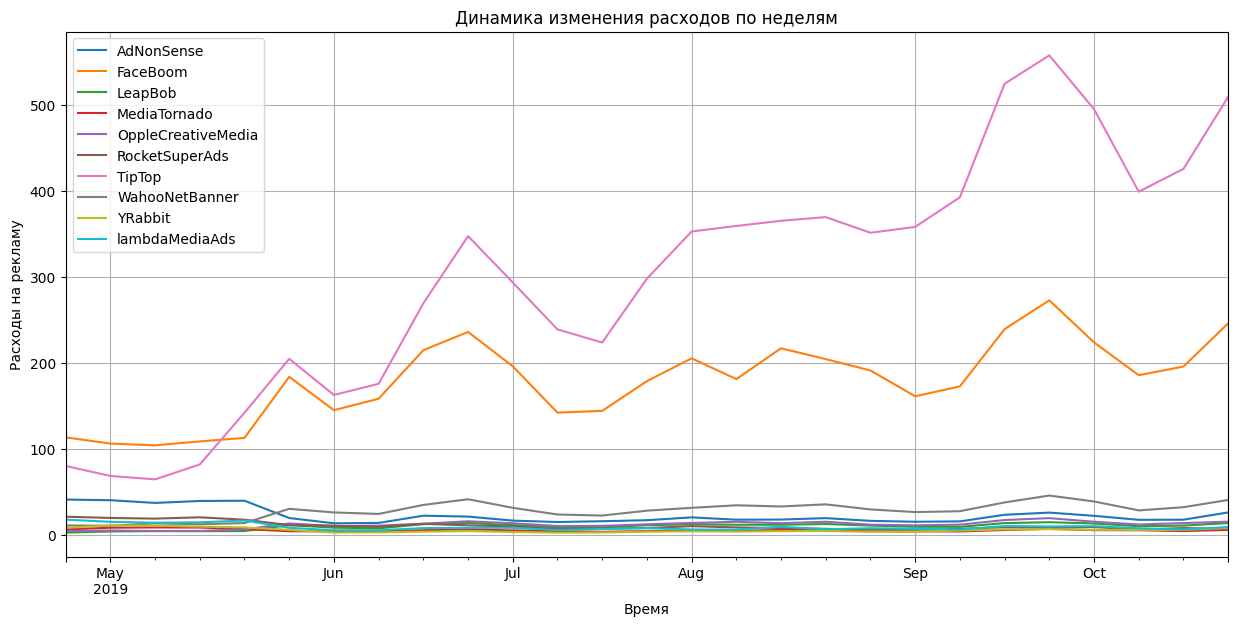

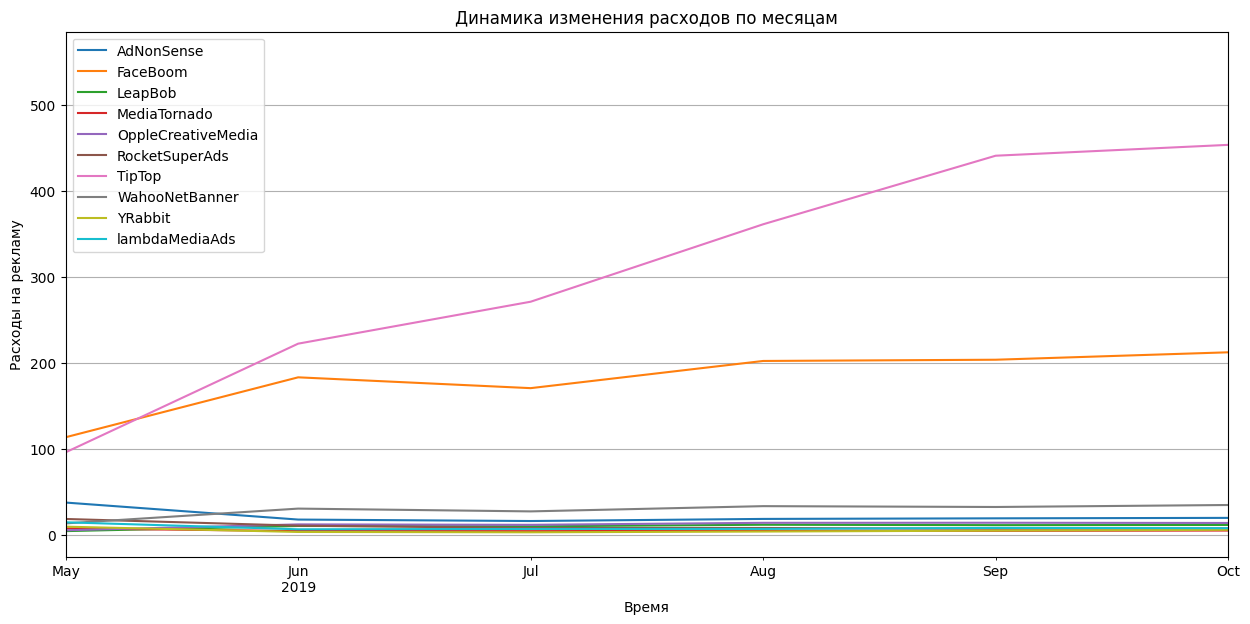

In [28]:
# создадим колонки с неделями и месяцами расходов источников
costs['month'] = costs['dt'].astype('datetime64[M]')
costs['week'] = costs['dt'].astype('datetime64[W]')

# создвем сводную таблицу с разбивкой по неделям
pivot_week_costs = costs.pivot_table(
    index='channel',
    columns='week',
    values='costs'
)

# задаём размер сетки для графиков
plt.figure(figsize=(15, 15))

ax1 = plt.subplot(2, 1, 1)
pivot_week_costs.T.plot(
        grid=True, ax=ax1
)
plt.legend()
plt.xlabel('Время')
plt.ylabel('Расходы на рекламу')
plt.title('Динамика изменения расходов по неделям')



# создвем сводную таблицу с разбивкой по месяцам
pivot_month_costs = costs.pivot_table(
    index='channel',
    columns='month',
    values='costs'
)

# задаём размер сетки для графиков
plt.figure(figsize=(15, 15))

ax2 = plt.subplot(2, 1, 2, sharey=ax1)
pivot_month_costs.T.plot(
        grid=True, ax=ax2
)
plt.legend()
plt.xlabel('Время')
plt.ylabel('Расходы на рекламу')
plt.title('Динамика изменения расходов по месяцам')



plt.show()

На графиках мы видим, что затраты на TipTop и FaceBoom стремительно расли в течение всего интервала наблюдения, в то время как затраты на остальные каналы привлечения оставался на приблизительно одном и том же уровне. Особенно выделяется TipTop, у которого затраты возросли в 4 раза, а плтящих пользователей он привлекает меньше, чем FaceBoom. Что послужило такому росту и купается ли такое кратное увеличения бюджета на рекламу?

<b>Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей.</b>

In [30]:
# среднее по арифметическому

profiles.groupby(
    by='channel'
).agg({
    'acquisition_cost':'mean',
}).sort_values(
    by='acquisition_cost',
    ascending=False
).round(2)

,acquisition_cost
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


И посчитаем общий CAC по всему исследуемому интервалу

In [47]:
print('Возможные варианты:')
print('Cредний `CAC` на одного пользователя:', profiles.query('channel != "organic"').acquisition_cost.mean())
print('Cредний `CAC` на одного пользователя:', costs.costs.sum() 
      /  profiles.query('channel != "organic"').user_id.nunique())

Возможные варианты:
Cредний `CAC` на одного пользователя: 1.127481323942928
Cредний `CAC` на одного пользователя: 1.127481323942759


Мы видим лидера по затратам на привлечение одного пользователя - снова TipTop, у которого значение почти в 3 раза больше, чем у любого другого. 

На данный момент мы наткнулись на кратное увеличение расходов на маркетинг у каналов TipTop	и FaceBoom. Для того, чтобы понять в этом ли кроется причина увеличения убытков компании, необходимо провести оценку окупаетмости рекламы.

<a class="anchor" id="roi"></a>
### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Будем считать, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

<b>Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.</b>

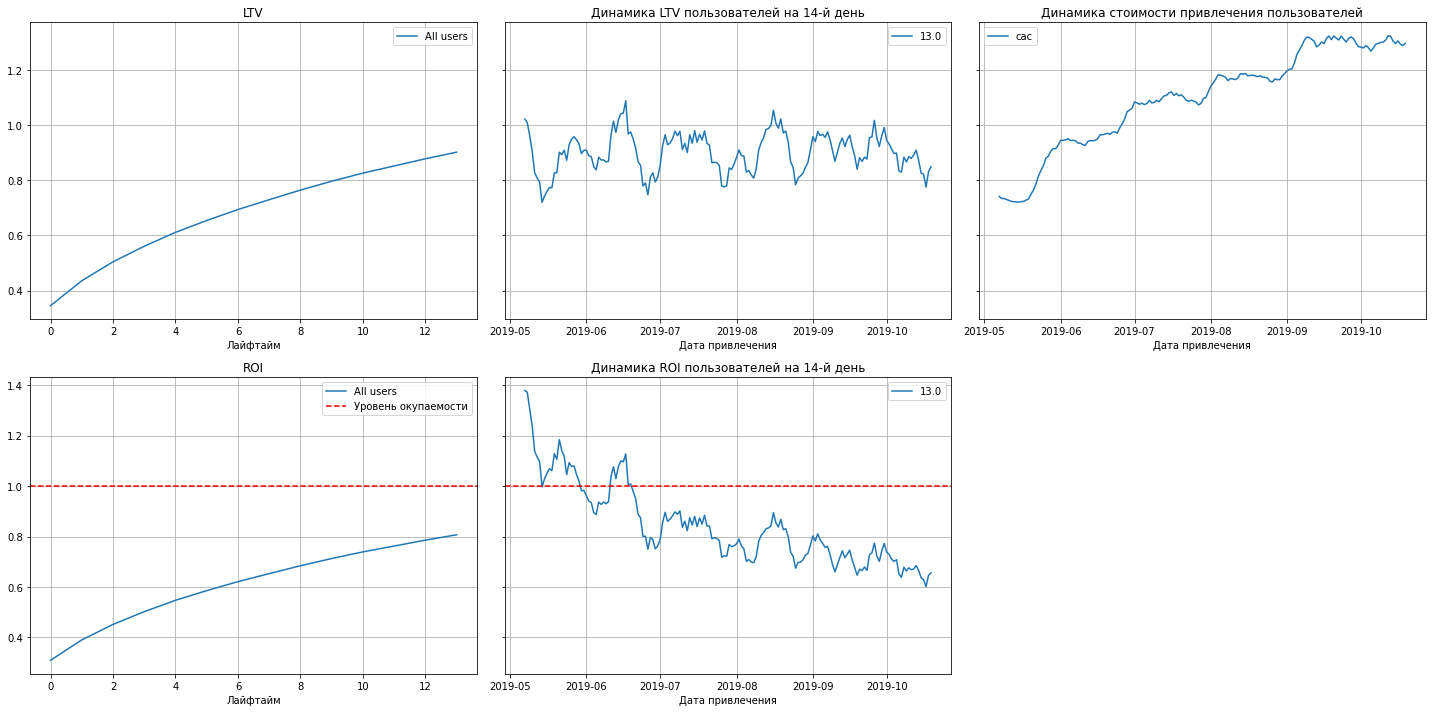

In [33]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 
profiles = profiles.query('channel != "organic"') # исключаем органиков, за них не платим

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Из графиков можно сделать выводы:
- Реклама не окупается: ROI на 14й день не достигает 100%.
- На LTV влияет сезонность, но она достаточно стабильна.
- А вот CAC стремительно растет, как и стремительно падает ROI на динамике. Все это указывает на то, что рекламный бюджет постоянно увеличивается, а привлеченные пользователи приносят нам денег все меньше. 

Проверим конверсию и удержание пользователей: может клиенты не пользуются платными услугами сервиса или они в ней "долго не живут".

<b>Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построем и изучим графики конверсии и удержания.</b>

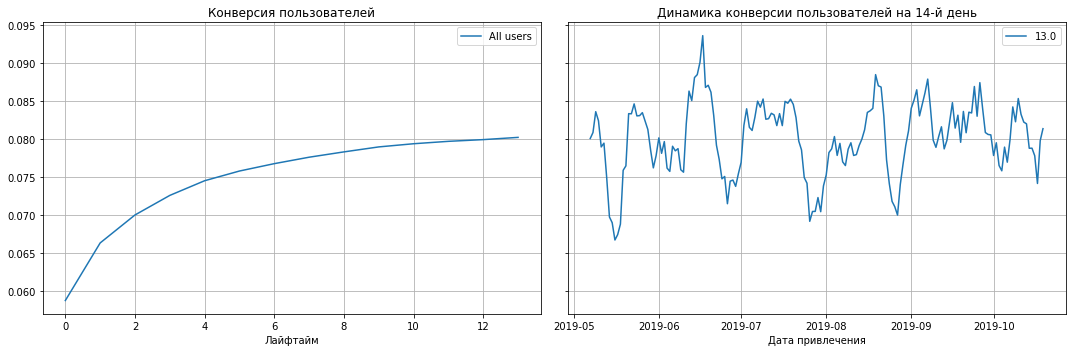

In [34]:
# смотрим конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам конверсия со временем не падает, даже наоборот - конверсия 14го дня понемногу растет. Возможно дело в удержании, построим график.

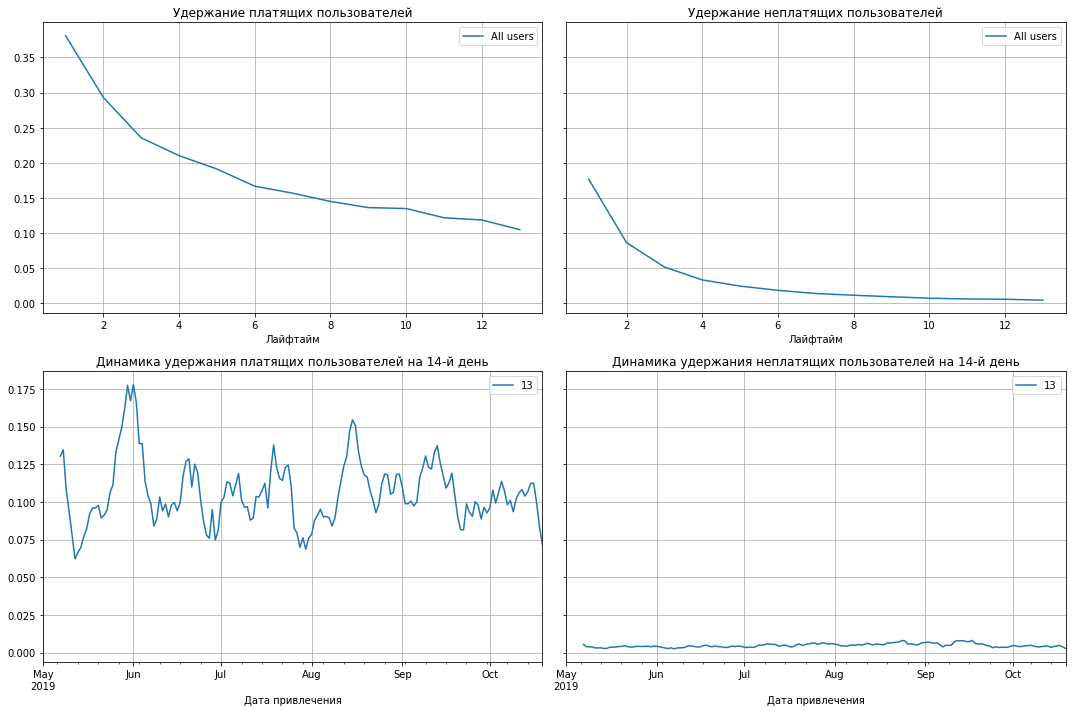

In [35]:
# смотрим удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Действительно, неплатящие клиенты стабильно плохо удерживаются и практически "не доживают" до конца второй недели. Возможно сервис не рассчитан на клиентов, которые не собираются платить, а возможно дело в технической проблеме и есть большой пласт людей, которые не смогли воспользоваться платными услугами и ушли. 

<b>Проанализируем окупаемость рекламы с разбивкой по устройствам. Построем графики LTV и ROI, а также графики динамики LTV, CAC и ROI.</b>

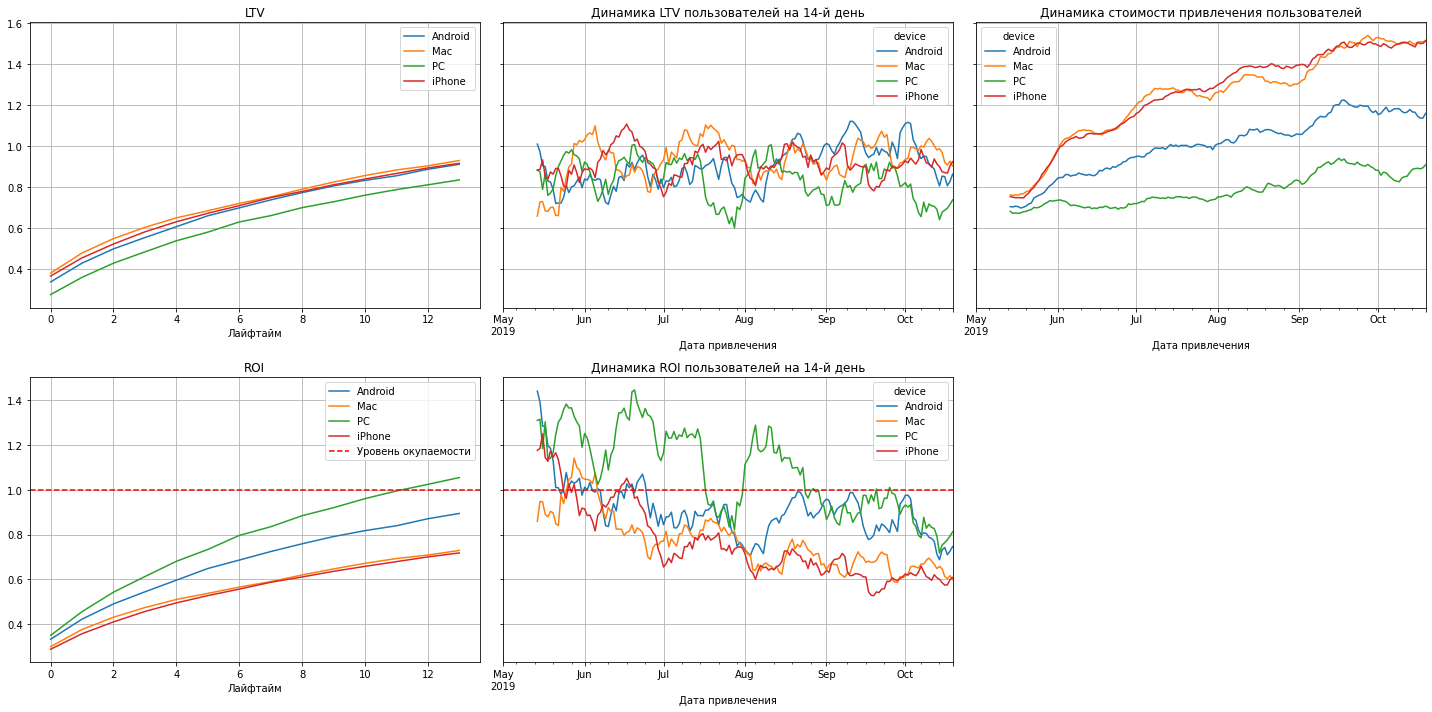

In [36]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

Мы видим, что пользователи PC окупаются на 13й день, в то время как все остальные пользователи - нет. iPhone и Мас - аутсайдеры на графике окупаемости. В то же время стоимость привлечения выросла для всех устройств, особенно для устройств продукции Apple, а ROI со временем показывает отрицательную динамику для всех устройств. Возможно отчасти дело в устройствах компании Apple, но глобально есть иная проблема, приносящая убытки.

<b>Проанализием окупаемость рекламы с разбивкой по странам. Построем графики LTV и ROI, а также графики динамики LTV, CAC и ROI.</b>

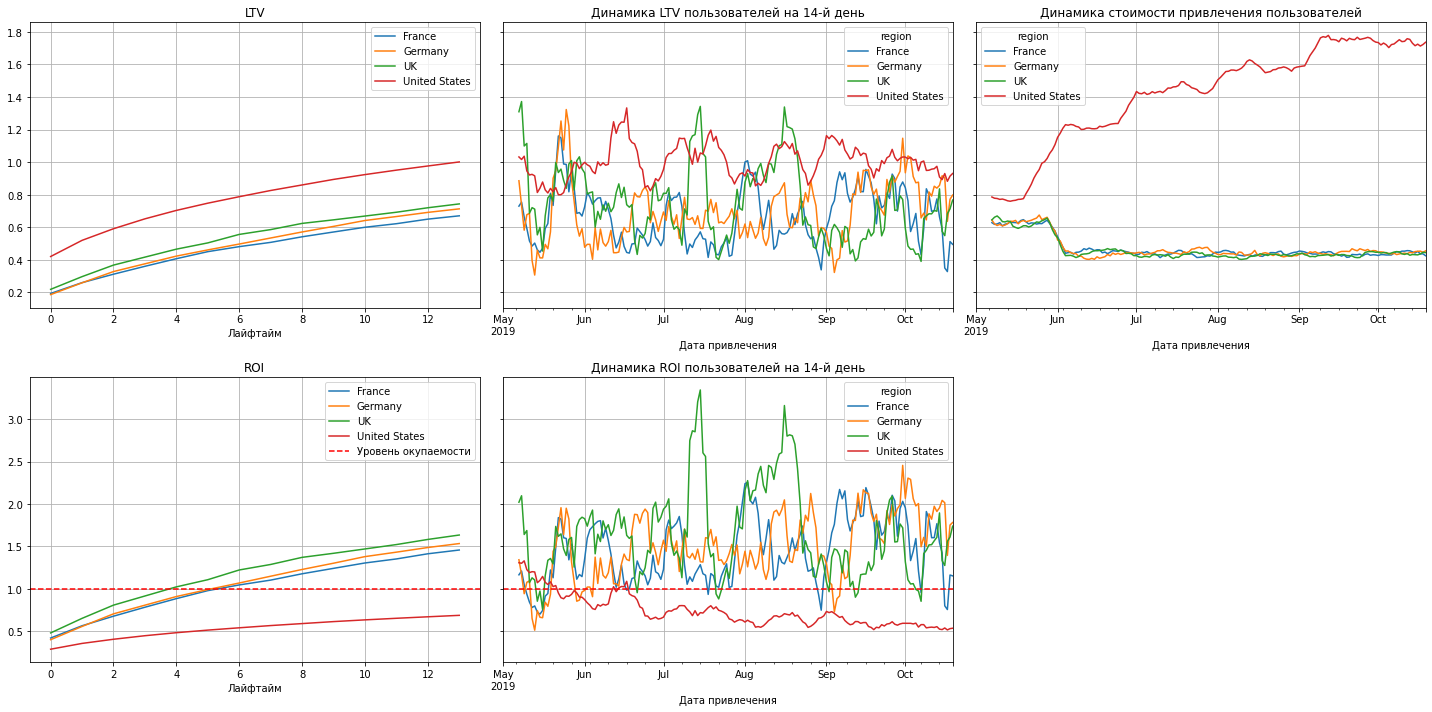

In [37]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

А вот и явная зацепка: США - единственные аутсайдер по окупаемости рекламы. Скорее всего это объясняет и пониженную окупаемость пользователей iPhone и Mac: в США соотношение продукции Apple к другим платформам в несколько раз выше, чем в остальных странах, из-за чего показатели по устройствам немного "утягиваются":

In [38]:
# создадим функцию для группировки и определения долей в таблице, 
# которая потом пригодится для определения долей раных групп

def share_table(table, # table - таблица по которой группируем
         group_value,  # fltr_column - в какой колонке ищем признак
         fltr_column,  # group_value - по какому признаку группируем
         dim=[]):      # dim - признаки для нахождения долей (указывать обязательно!)
                                             
    df_copy = table.copy()               
    df_copy['share'] = df_copy[fltr_column].isin(dim)

    df_group = df_copy.groupby(
        by=group_value
    ).agg({
        'share':'mean'
    }).sort_values(
        by='share',
        ascending=False
    ).round(2)
    
    return df_group

In [39]:
share_table(visits, 'region', 'device', dim=['iPhone', 'Mac'])

,share
region,
United States,0.69
France,0.30
Germany,0.30
UK,0.30


(доля устройств компании Apple по отношению к другим в Америке более чем в 2 раза больше, чем в других исследуемых странах).
Также стоить заметить, что у остальных регионов динамика стоимости привлечения показала сничение стоимости на рекламу. Возможно в маркетинке у каналов произошли какие-то качественные изменения, которые на одних странах отразилось позитивно, а на других наоборот. Нужно исследовать динамику по каналам привлечения.

<b>Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построем графики LTV и ROI, а также графики динамики LTV, CAC и ROI.</b>

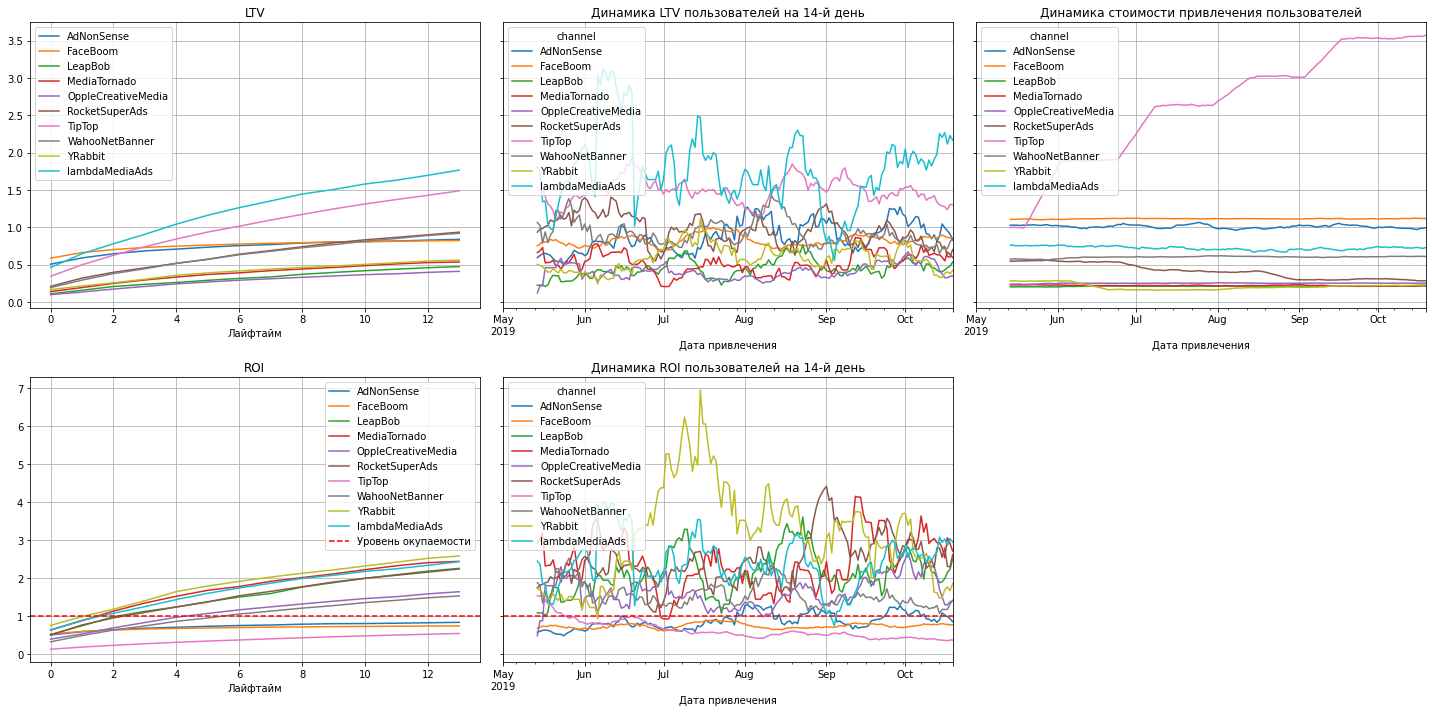

In [40]:
# смотрим окупаемость с разбивкой по рекламным каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

Мы видим стремительное увеличение стоимости рекламы у канала TipTop. Также заметно, что каналы TipTop и FaceBoom, у которых возросли расходы на рекламу, показывают наихудшие результаты по окупаемости. И если у FaceBoom стоимость привлечения не возросла (скорее всего компания просто увеличила бюджет на этот рекламный сервис), то у TipTop стоимость привлечения увеличилась примерно в 3.5 раза. 

А каналы RocketSuperAds и YRabbit показали понижение стоимости привлечения (отразившееся на разбивке по странам на графике выше) при хорошей окупаемости. Стоит взять на вооружение эти каналы.

Посмотрим на то, как распределены клиенты между каналами привлечения TipTop и FaceBoom и странами:

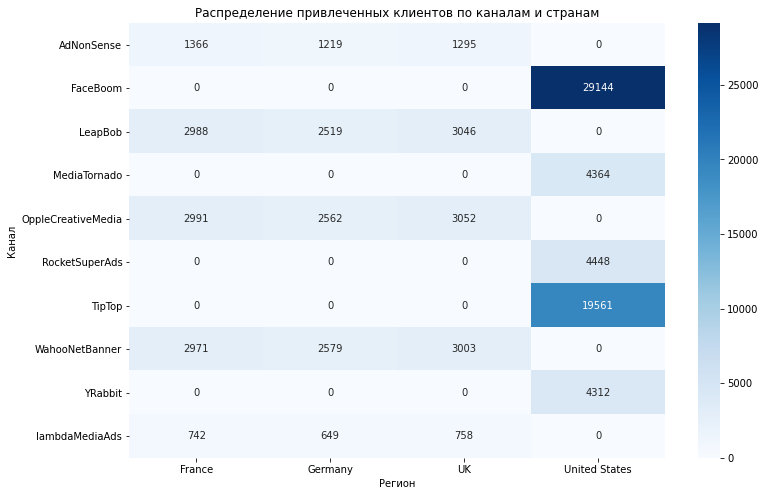

In [41]:
# построем тепловую карту по количеству привлеченных клиентов по каналам и странам

pivot_ch_r = profiles.pivot_table(
    index='region',
    columns='channel',
    values='user_id',
    aggfunc='count'
).fillna(0)

plt.figure(figsize = (12,8))
sns.heatmap(pivot_ch_r.T, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Регион')
plt.ylabel('Канал')
plt.title('Распределение привлеченных клиентов по каналам и странам');

В США эти два убыточных сервиса занимают 50% от других сервисов, при этом ими пользуются ТОЛЬКО для привлечения клиентов в Американской стране. Маркетологам из компании нужно пересмотреть выбор рекламных сервисов для США.

А теперь посмотрим на __удержание и конверсию с разбивкой по каналам__

In [42]:
# немного изменим функцию, чтобы она выводила только 2 графика удержания
def plot_retention_grouped_only(retention_grouped, retention_grouped_history, horizon_day, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention_grouped = retention_grouped.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_grouped_history = retention_grouped_history.drop(columns=['cohort_size'])[
        [horizon_day - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention_grouped.index.nlevels == 1:
        retention_grouped['cohort'] = 'All users'
        retention_grouped = retention_grouped.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention_grouped.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention_grouped.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')
    
    plt.tight_layout()
    plt.show() 

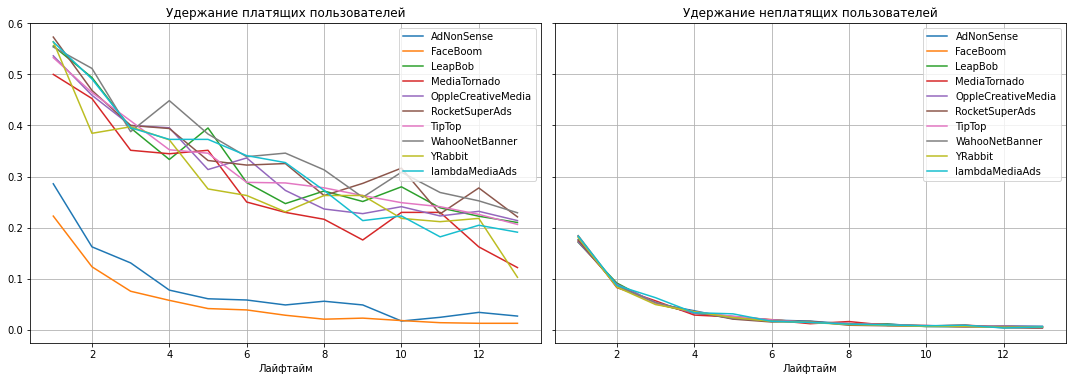

In [43]:
# смотрим удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

plot_retention_grouped_only(retention_grouped, retention_history, horizon_days) 

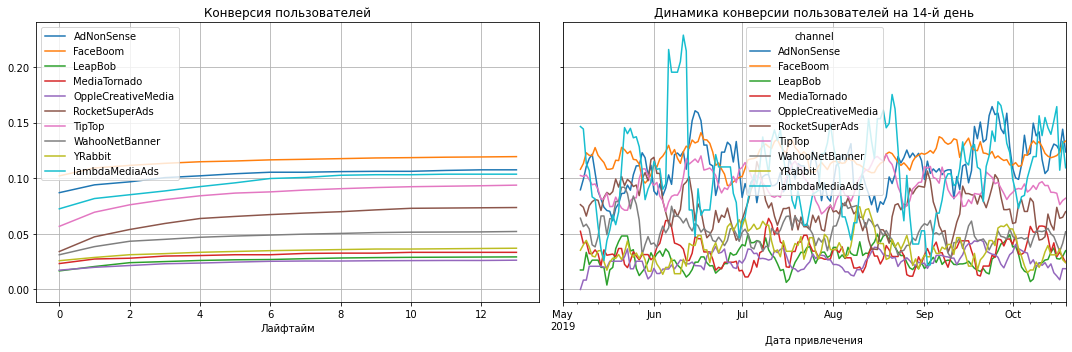

In [44]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Удержание каналов FaceBoom и AdNonSense просто ужасающее по сравнению с другими каналами. 

Посмотрим на __удержание и конверсию по регионам__

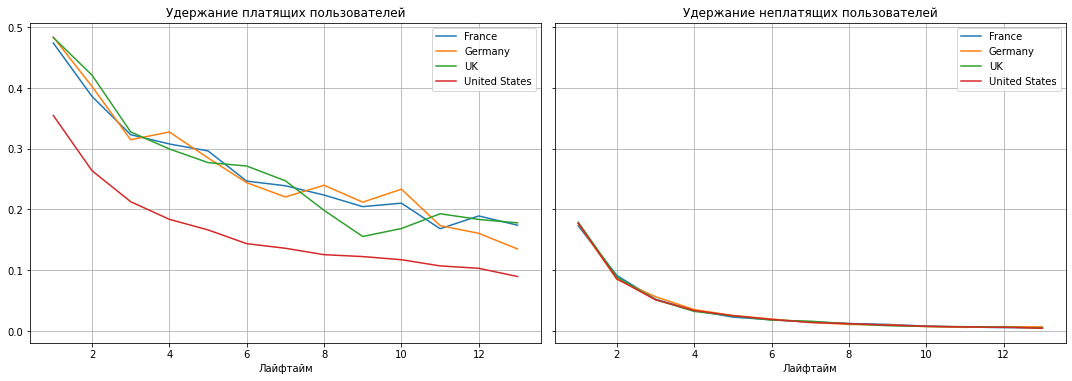

In [45]:
# смотрим удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)

plot_retention_grouped_only(retention_grouped, retention_history, horizon_days) 

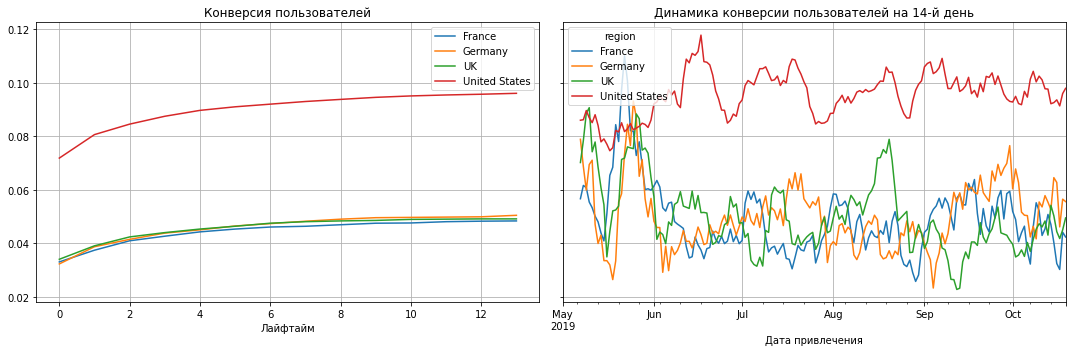

In [46]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Удержание США ниже всех остальных при наилучшей конверсии.

Рассмотрим __удержание и конверсию по девайсам__

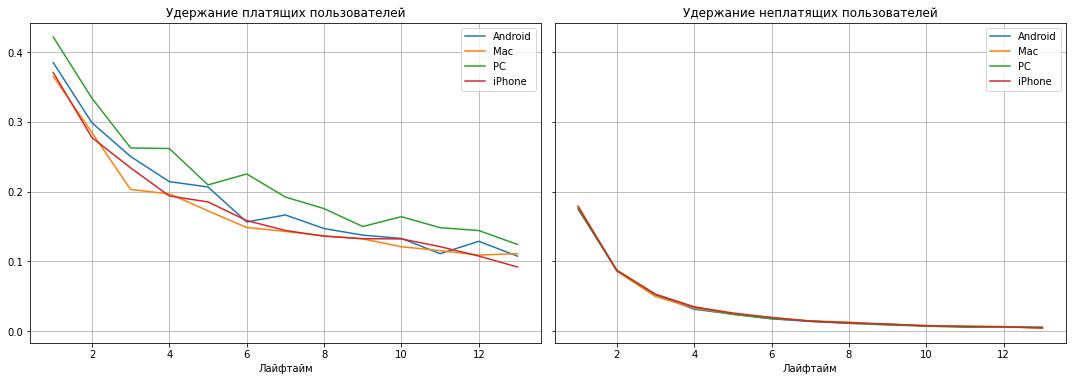

In [47]:
# смотрим удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)

plot_retention_grouped_only(retention_grouped, retention_history, horizon_days) 

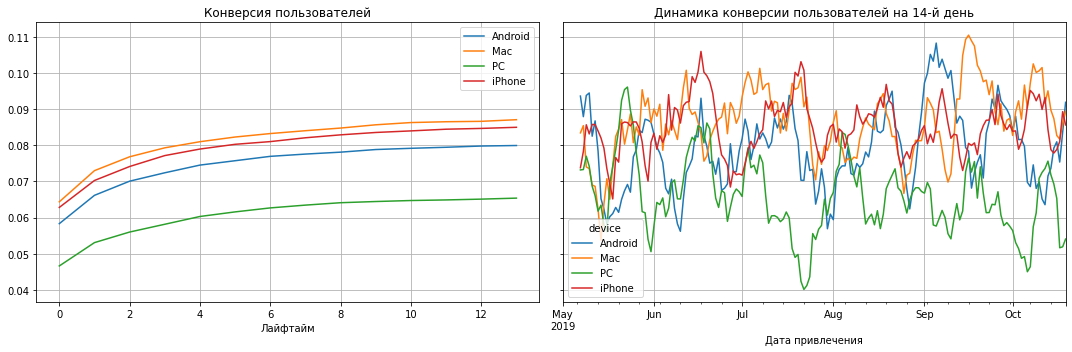

In [48]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

В данной разбивке нет выделяющихся значений для девайсов.

По итогу мы имеем плохое удержание у каналов FaceBoom и AdNonSense и у региона США. Можно было бы предположить, что виновато удержание в регионе и клиентам в данном регионе не интересен сервис в целом, но у нас имеется великолепные примеры калалов Yrabbit и RocketSuperAds, которые также осуществляют маркетинг только на территории США и имеют отличные показатели CAC и ROI. Значит проблема в этих двух сервисах и стоит решить вопрос о целесообразности их использования.

<b>Ответим на такие вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом?
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости?</b>

В целом реклама не окупается: ROI не достигает 100% за 14 дней с момента привлечения. При этот стоимость привлечения (САС) постоянно растет и как мы ранее выяснили, виноват в этом канал TipTop. 

Каналы TipTop и FaceBoom не окупают затраты на рекламу. Оба эих канала территориально работают только с пользователями США, имеют довольно большие цифры по количеству привлеченных пользователей, стоимости привлечения и низкому удержанию. При этом другие каналы, территориально работающие только с США, показывают хорошую окупаемость. Значит каналы TipTop и FaceBoom портят общую статистику окупаемости по странам, и как мы ренее выяснили, по устройствам. 

Проверим как будет выглядеть окупаемость, если мы не будем пользоваться убыточными сервисами 

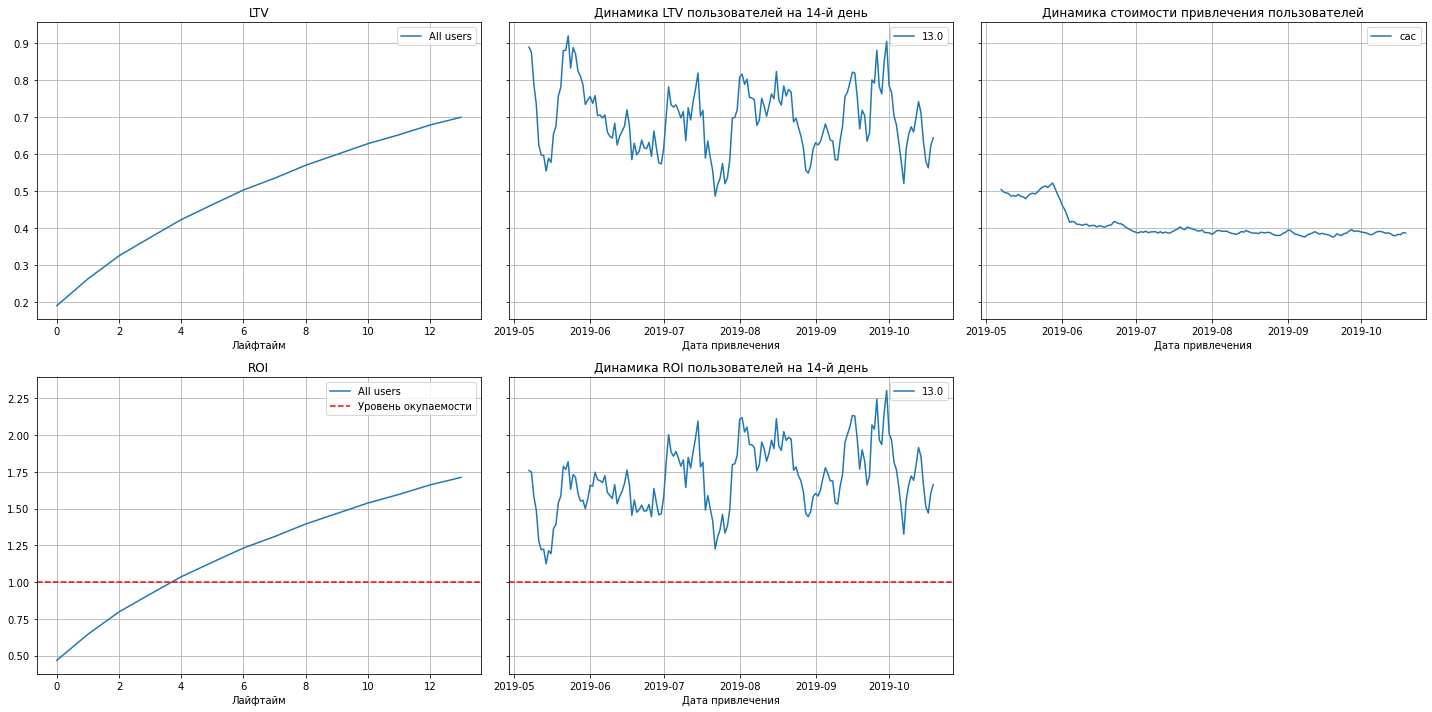

In [49]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "FaceBoom" and channel != "TipTop"'),
    orders,
    observation_date,
    horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Результат налицо! Убыточные каналы тратами приводили к не окупаемости всей рекламы. Проверим нашу теорию о том, что они также искажали показатели окупаемости по устройствам и странам.

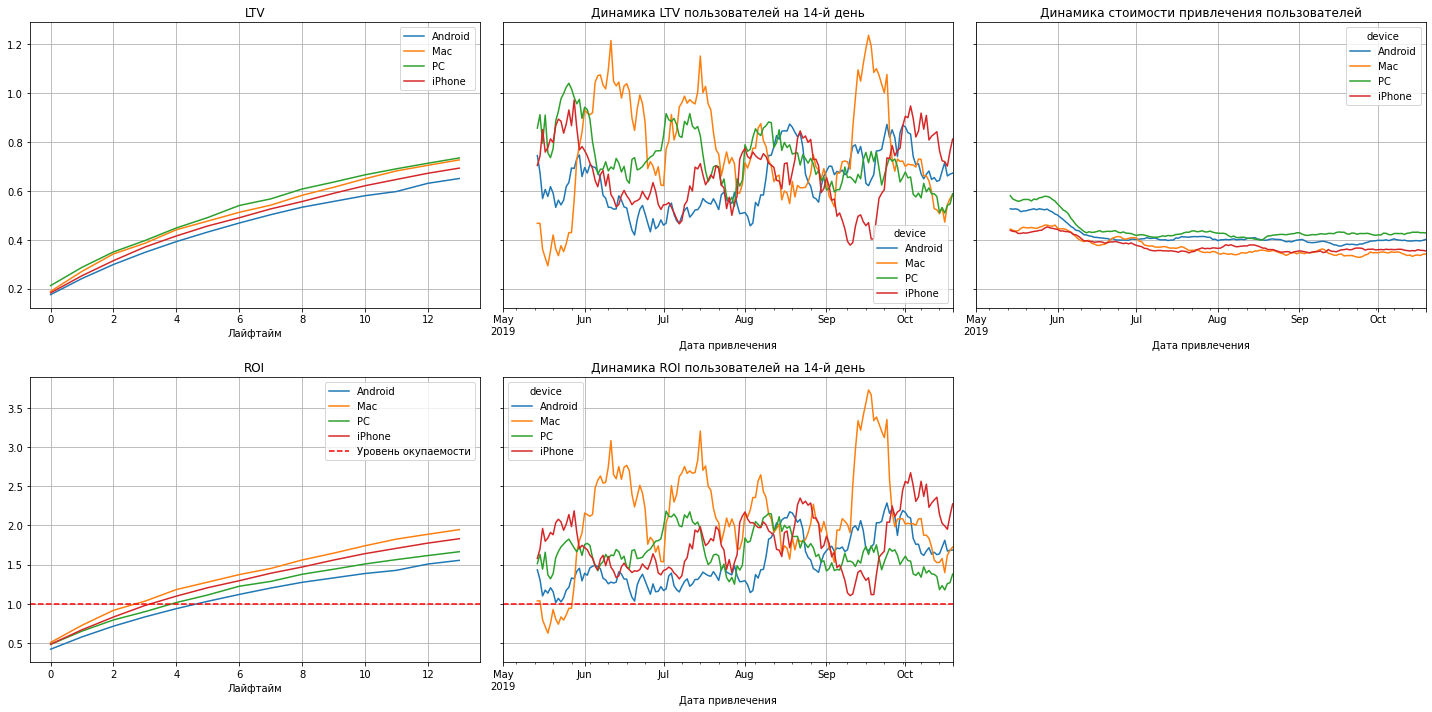

In [50]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "FaceBoom" and channel != "TipTop"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

Действительно, показатели CAC выровнялись и показыввают хорошую динамику ROI - теперь к концу второй недели вообще нет "убыточных" устройств. И более того: все каналы окупаются не позже пятого дня после привлечения.

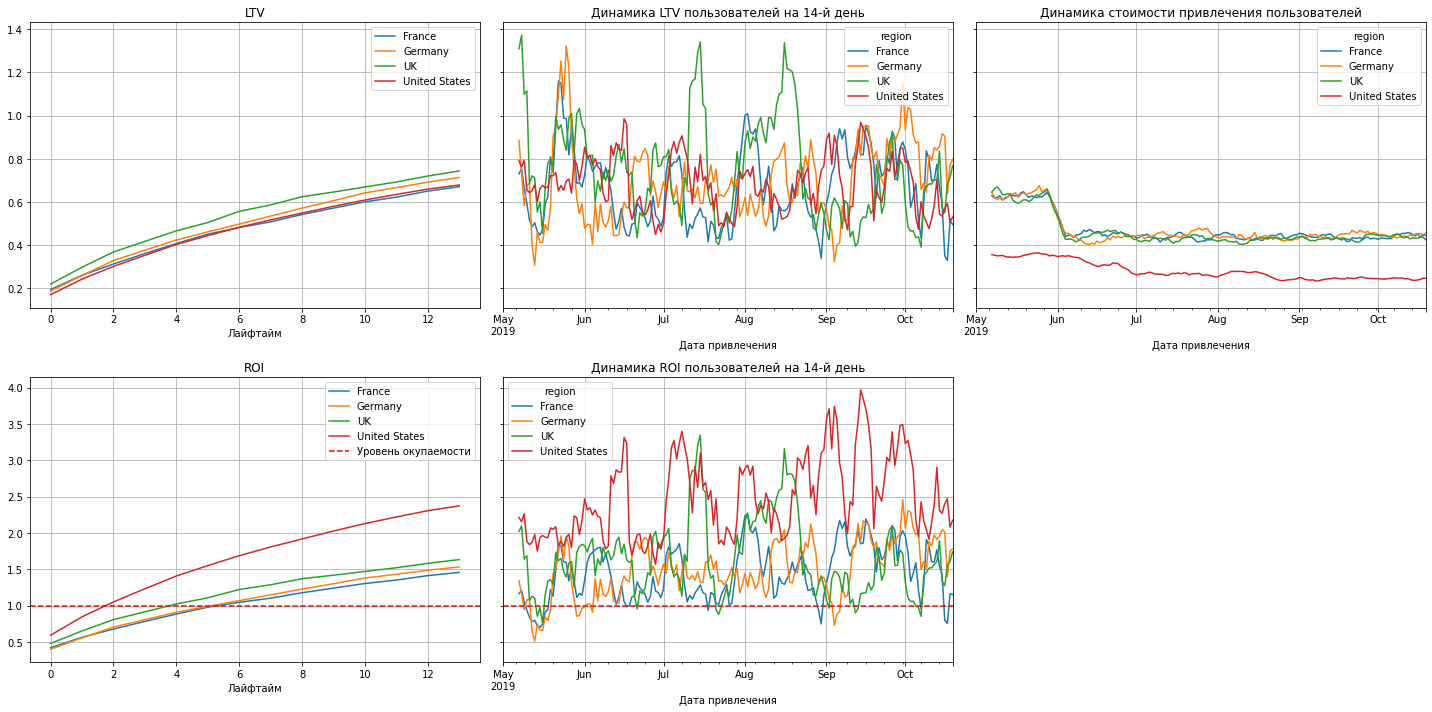

In [51]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "FaceBoom" and channel != "TipTop"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Оказалось, что реклама в США может быть самой эффективной, т.к. в ней самая низкая стоимость привлечения. 

Если избавиться от убыточных каналов для привлечения трафика в США и подключить на место них более эффективные, с похожей стоимостью как у других каналах на рынке Америки, можно улучшить показатели прибыли.

Напоследок взглянем на удержание и конверсию по регионам и девайсам без убыточных для США каналов привлечения

Посмотрим на __удержание и конверсию по регионам__

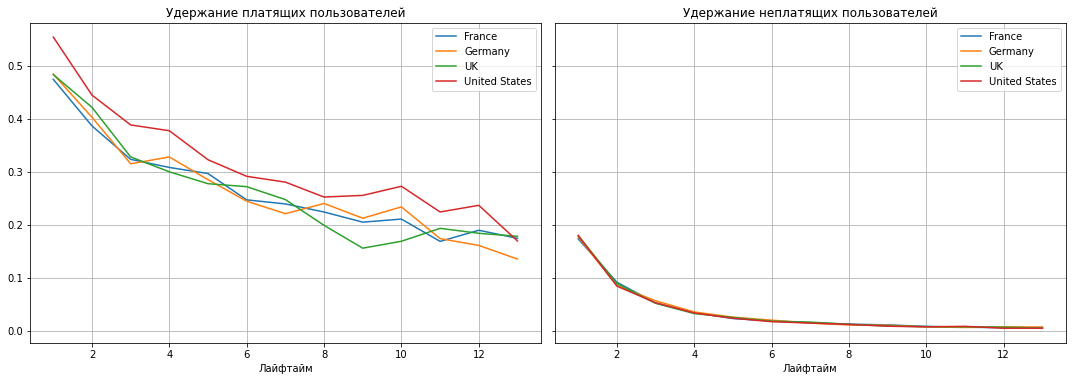

In [52]:
# смотрим удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "FaceBoom" and channel != "TipTop"'),
    visits,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)

plot_retention_grouped_only(retention_grouped, retention_history, horizon_days) 

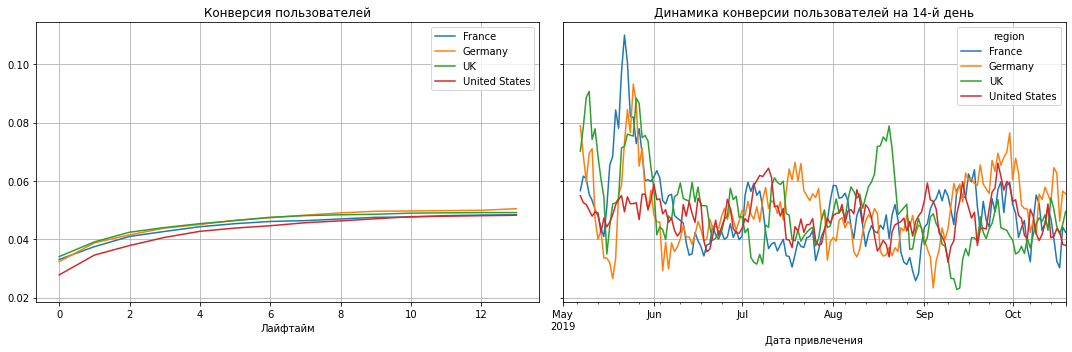

In [53]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel != "FaceBoom" and channel != "TipTop"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Удержание США ниже выше остальных при примерно такой же как у всех конверсии.

Рассмотрим __удержание и конверсию по девайсам__

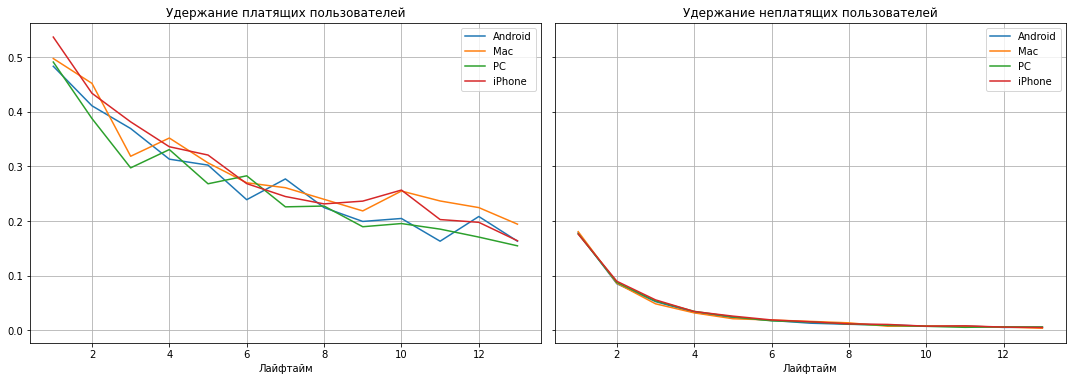

In [54]:
# смотрим удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "FaceBoom" and channel != "TipTop"'),
    visits,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)

plot_retention_grouped_only(retention_grouped, retention_history, horizon_days) 

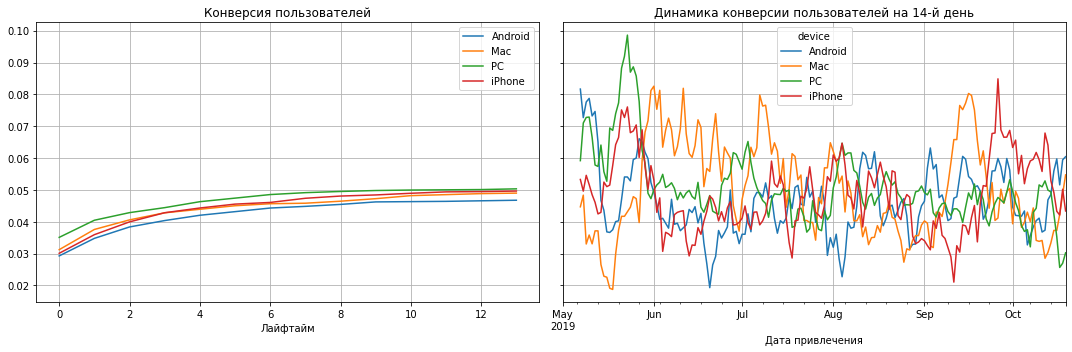

In [55]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel != "FaceBoom" and channel != "TipTop"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Показатели по девайсам усреднились и теперь нет аутсайдеров, которые были при наличии каналов TipTop и FaceBoom

<b>Напишем вывод, опишем возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.</b>

- На данный момент обнаружены два проблемных рекламных каналов, которые не приносят прибыли, а лишь убытки: FaceBoom и TipTop. У рекламного источника привлечения FaceBoom CAC выше, чем у других (за исключением TipTop), самое плохое удержание, при этом LTV практически сразу входит в состояние "плато" из-за низкого Retention, в результате чего выходит, что эффективность рекламы низкая и привлекаются лиды, которые довольно быстро перестанут пользоваться сервисом. При этом в этот канал вкладывается довольно большой бюджет, что еще больше негативно сказывается на прибыли. 

- У TipTop другая проблема: CAC повышается ежемесячно и многократно. За последние, приблизительно, 5 месяцев стоимость привлечения повысилась более, чем в 3.5 раза. LTV выглядит очень оптимистично, но, видимо, перечеркивается высоким CAC. В результате мы имеем большое количество лидов, часть из которых становится покупателями и хорошо удерживается, но не обгоняет динамику роста CAC. Реклама, как и у FaceBoom, не окупается и данный канал приносит убытки.

- Есть вероятность найти причину повышения стоимости у канала TipTop, устранить ее и собрать статистику после изменений, что в перспективе может позволить сэкономить на поиске и заключении договора с другим рекламным  сервисом, если по результатам получатся успешные показатели, т.к. предпосылки к этому есть в виде хорошего LTV и удержания.  

- Если стоимость привлечения у TipTop не удастся вернуть на уровень мая (рынок США это позволяет), от каналов TipTop и FaceBoom, которые работают с аудиторией США, скорее всего стоит отказаться. Но судя по успешности других рекламных сервисов в данной локации можно заметить самую низкую стоимость привлечения и быструю окупаемость рекламы. FaceBoom имел хороший LTV, TipTop хороший Retention, поэтому есть потенциал на рынке США для нахождения будущих покупателей, возможно при невысокой стоимости привлечения. 

- Также обратить внимание на канал AdNonSense, ситуация по которому аналогична FaceBoom: низкий LTV, Retention, высокий CAC. Разница лишь в том, что этот сервис работает с тремя странами, из-за чего диверсифицированные проблемные места не бросаются в глаза при просмотре общих графиков, например, по странам (как видим на графиках ниже, данных канал работает плохо во всех регионах). Его тоже стоит заменить на более эффективный канал. 

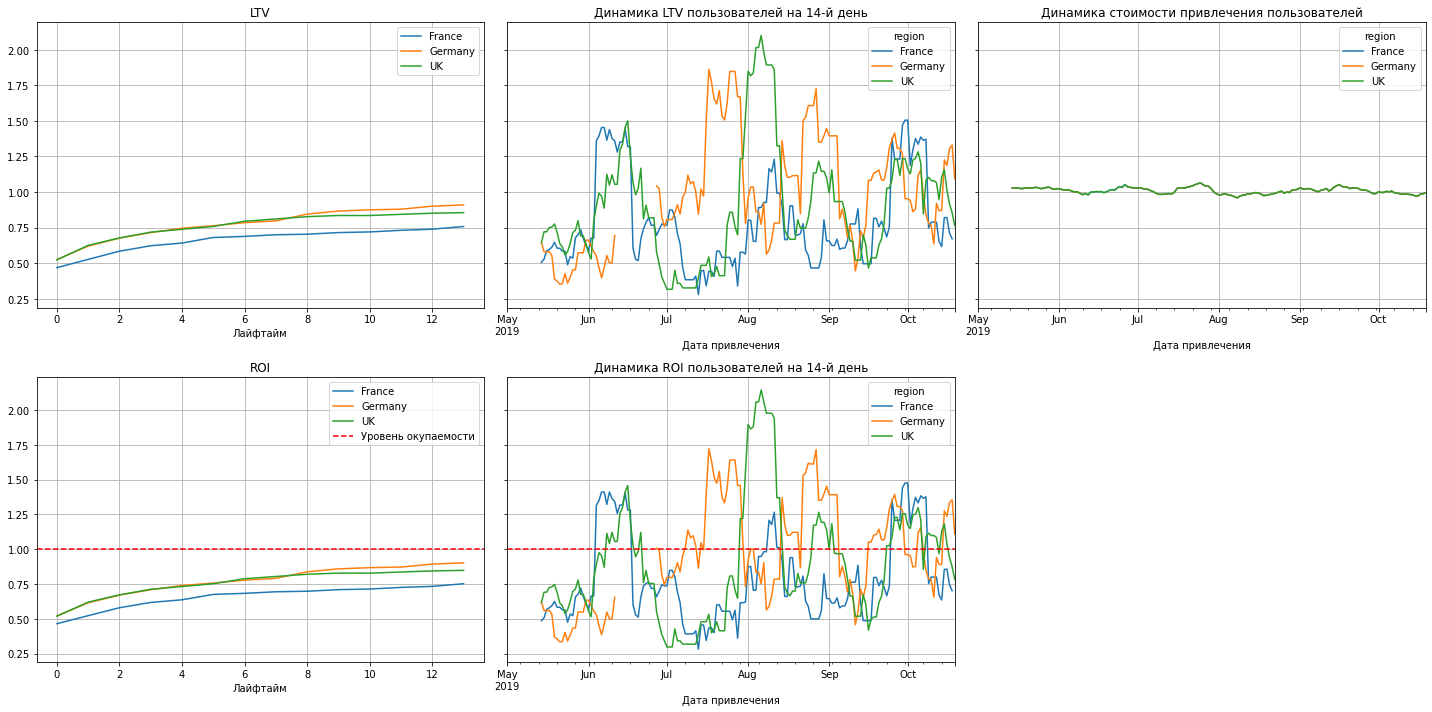

In [56]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel == "AdNonSense"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

<a class="anchor" id="conclusion"></a>
### Напишем выводы

<b>Выделим причины неэффективности привлечения пользователей</b>

- У канала FaceBoom и AdNonSense высокая стоимость привлечения, плохое удержание, что негативно сказывается на LTV, а следовательно и на окупаемость рекламы.
- У канала TipTop аномальный рост стоимости привлечения обгоняет рост LTV, поэтому канал не окупается в течение двух недель после привлечения. 

<b>Сформулируем рекомендации для отдела маркетинга.</b>

- Отказаться от каналов FaceBoom и AdNonSense.
- Попытаться найти причину роста стоимости у TipTop и вернуть на уровень мая. Если удастся добиться этим положительных результатов по LTV и ROI (стабильный рост LTV и окупаемость в первые две недели), тогда мы сохраним средства на поиск новых каналов привлечения.
- Стоит отказаться от FaceBoom и AdNonSense, т.к. они приносят лишь убытки.
- Если снизить стоимость привлечения у TipTop не удалось, стоит отказаться и от него. 
- На замену отверженых каналов, работающих с аудиторией США, стоит найти другие каналы, желательно работающие только с аудиторией США (судя по графикам и хитмэпу у этих компаний невысокая стоимость привлечения на рынке США и хорошая окупаемость и LTV).
- На фоне остальных выделяются каналы Yrabbit и RocketSuperAds, работающие также по одному региону США, у которых хорошее удержание, стоимость рекламы постепенно падает, при этом ROI растет. Стоит рассмотреть их кандидатуру RocketSuperAds на замену TipTop и FaceBoom. Я бы не рекомендовал вкладываться в канал Yrabbit. Почему я так думаю: да, канал сейчас окупается, потому что там низкий CAC. Фактически мы сейчас сильно много не платим за новых клиентов (CAC = 0,21) . И уже на этих клиентах (которые обошлись нам недорого) мы сможем спрогнозировать будущую картину. Они имеют низкую конвертируемость и сильно падающее удержание на последних днях горизонта. Т.е. можно сделать вывод, что им не интересно наше приложение. Возможно, это просто не наша аудитория. Они не заинтересованы в нашем приложении.

[К содержанию](#toc)